In [196]:
# Import Libraries & Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [212]:
data=pd.read_excel("C:\\Users\\user\\Desktop\\Telecom_Churn_Analysis\\Prediction_Data.xlsx",sheet_name="vw_ChurnData")

In [214]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11340-JAM,Female,21,No,Jammu & Kashmir,8,7,NaN,Yes,No,...,Bank Withdrawal,19.950001,219.500000,0.0,0,78.599998,298.100006,Stayed,Others,Others
1,11348-MAH,Female,46,No,Maharashtra,11,19,Deal 3,Yes,No,...,Bank Withdrawal,56.049999,1522.650024,0.0,110,1235.079956,2867.729980,Stayed,Others,Others
2,11359-AND,Female,28,Yes,Andhra Pradesh,3,6,Deal 4,Yes,No,...,Credit Card,20.500000,290.549988,0.0,0,435.839996,726.390015,Stayed,Others,Others
3,11370-TAM,Female,21,No,Tamil Nadu,15,10,Deal 4,Yes,No,...,Credit Card,59.099998,772.849976,0.0,0,476.140015,1248.989990,Stayed,Others,Others
4,11392-JAM,Female,39,Yes,Jammu & Kashmir,11,1,Deal 2,Yes,No,...,Bank Withdrawal,84.400002,4484.049805,0.0,0,1655.640015,6139.689941,Stayed,Others,Others


In [216]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

# Data Processing

In [218]:
data['Customer_Status'].value_counts()

Customer_Status
Stayed     4275
Churned    1732
Name: count, dtype: int64

In [220]:
# Drop columns that won't be used for prediction
data= data.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)

#List of columns to be label encoded
columns_to_encode = [
    'Gender','Married','State','Value_Deal','Phone_Service','Multiple_Lines',
    'Internet_Service','Internet_Type','Online_Security','Online_Backup',
    'Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies',
    'Streaming_Music','Unlimited_Data','Contract','Paperless_Billing','Payment_Method'
]

#Encode categorical variables except the target variable 

label_encoders={}
for column in columns_to_encode:
    label_encoders[column]=LabelEncoder()
    data[column]= label_encoders[column].fit_transform(data[column])

#Manually encode the target variable 'Customer_Status'
data['Customer_Status']=data['Customer_Status'].map({'Stayed':0,'Churned':1})

#Split data into features and target
X = data.drop('Customer_Status',axis=1)
y=data['Customer_Status']

#Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [222]:
# Train Random forest Model
# Initialize the Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

#Train The Model
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[810  54]
 [124 214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       864
           1       0.80      0.63      0.71       338

    accuracy                           0.85      1202
   macro avg       0.83      0.79      0.80      1202
weighted avg       0.85      0.85      0.85      1202



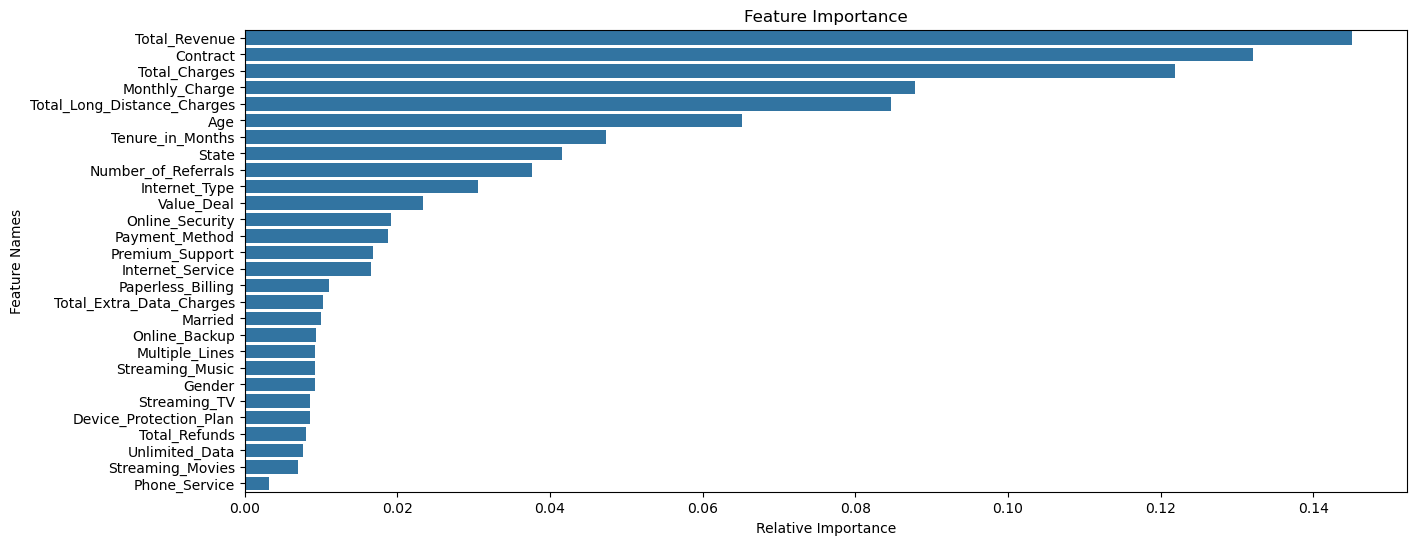

In [228]:
# Evaluate Model
# Make Predictions
y_pred = rf_model.predict(X_test)

#Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

#Feature Selection using Feature Importance
importances=rf_model.feature_importances_
indices= np.argsort(importances)[::-1]

import matplotlib.pyplot as plt
import seaborn as sns
#Plot the Feature Importances
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=X.columns[indices])
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [232]:
#Predict on New Data
# Define the path to the joiner data excel file
new_data= pd.read_excel("C:\\Users\\user\\Desktop\\Telecom_Churn_Analysis\\Prediction_Data.xlsx",sheet_name="vw_JoinData")
# Display the first few rows to fetch the data
new_data.head()

#Retain the original dataframe to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that wont be used for prediction in the encoded DataFrame
new_data= new_data.drop(['Customer_ID','Customer_Status','Churn_Category','Churn_Reason'],axis=1)

# Encode Categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make Predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original dataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data= original_data[original_data['Customer_Status_Predicted']==1]

# save the results
#original_data.to_csv(r"C:\Users\user\Desktop\Telecom_Churn_Analysis", index=False)

original_data.to_csv(r"C:\Users\user\Desktop\Telecom_Churn_Analysis\output.csv", index=False)
